<a href="https://colab.research.google.com/github/sachi9004/AnalyticsVidhya_BlackFriday/blob/master/Video%20Analytics(Tom%20%26%20Jerry).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab's New Code Editor

Colab is moving to a new code editor which includes:
* Richer completions
* Additional keybinding options
* Improved accessibility

## Enabling and disabling the new editor

The new editor can be controlled with the experiment button in the top-right.

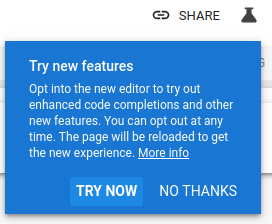
### Issues
You can disable the new editor if you run into issues, but please do let us know why so that we can fix any complaints.

Bugs can be filed at https://github.com/googlecolab/colabtools/issues/new, or use the 'Send feedback...' option in the Help menu.

# Automatic Completions

Code completions and documentation hints occur automatically while you type.

Use the following keyboard shortcuts:
 - `Ctrl-space` to re-open completions.
 - `Ctrl-shift-space` to re-open parameter hints.

![Rich completions](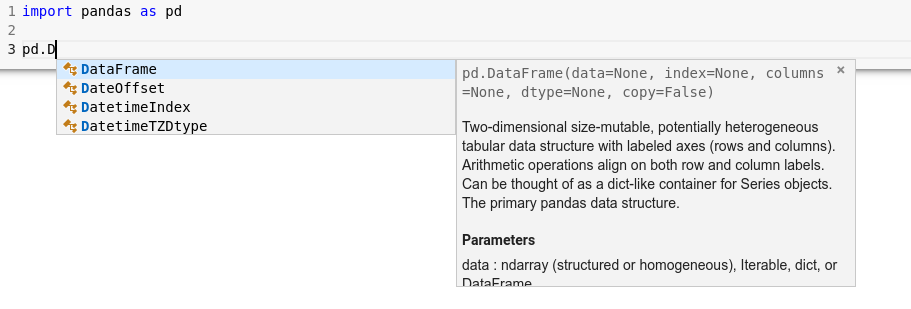
)




## Disabling automatic completions

Automatic completions can be disabled in Settings with the "Automatically trigger code completions" option.

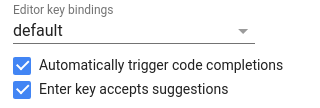

# Keyboard Bindings

The default editor keyboard bindings have been updated and there are now additional options for keybindings including:

* Vim
* Classic - restores some common keyboard shortcuts from the previous editor.

These options are available in Settings with the "Editor key bindings" option.

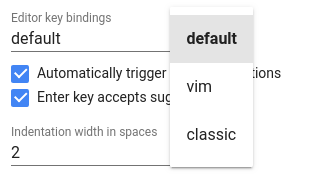

With automatic completions disabled use:
 - `Tab` to re-open completions.
 - `Shift-tab` to re-open parameter hints.

In [0]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
count = 0
videoFile = "/content/drive/My Drive/Analytics Vidhya/Video analytics/Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


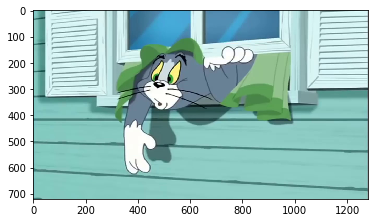

In [39]:
img = plt.imread('frame5.jpg')   # reading image using its name
plt.imshow(img)

In [43]:
data = pd.read_csv('/mapping.csv')    
data.head()     

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [0]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [0]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

We will be using a VGG16 pretrained model which takes an input image of shape (224 X 224 X 3). Since our images are in a different size, we need to reshape all of them. We will use the resize() function of skimage.transform to do this.

In [0]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

Now let us see the reshaped image of frame 5

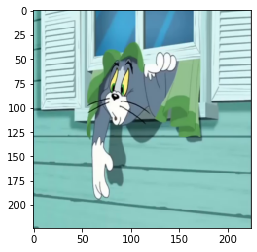

In [49]:
plt.imshow(X[5])

# Richer syntax highlighting

Improved support for nested languages:

```notebook-python
df = pd.io.gbq.read_gbq('''
  SELECT 
    REGEXP_EXTRACT(name, '[a-zA-Z]+'),
    SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''')
```